# OpenAI Assistant AI

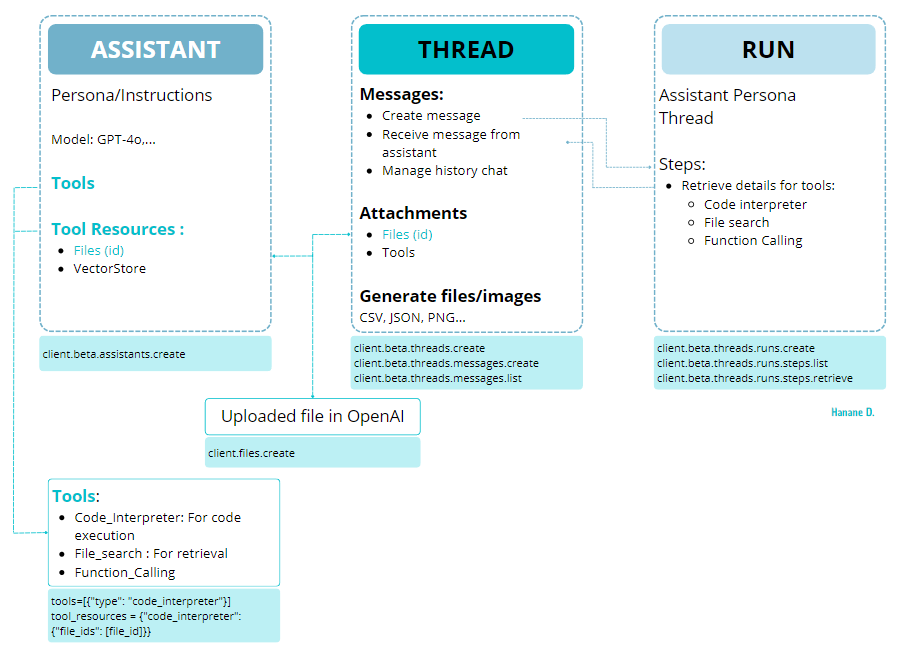

In [ ]:
from IPython.display import Image, display

# local_path = "YOUR_PATH/images/"
display(Image(filename=local_path+"OpenAI_Assistant_AI.png"))

## **Process:**

1.   Prepare your data : our use case historical prices of BTCUSD

2.   Load your **FILE** in OpenAI: `client.files.create with purpose='assistants'`

3.   Create your **ASSISTANT** by specifying the model (gpt-4), instructions, tools ('code interpreter, retrieval, function_calling') : in our case, code_interpreter, to perform calculation with Python.
`client.beta.assistants.create`

4.   Create an **ASSISTANT FILE**, by attaching a file to an assistant: The file in step 2 to the assistant in step 3.
`client.beta.assistants.files.create`

5.   Create a **THREAD** to start a conversation and store history. You can feed the thread with a list of files (in our case one file). Initialize it with a question.
`client.beta.threads.create`

6.   Create **MESSAGES** and add them to the thread as the user ask and interact with the model
`client.beta.threads.messages.create`

7.   Create a **RUN** and run the Assistant on the THREAD
```
client.beta.threads.runs.create(thread_id=my_thread_id,assistant_id=my_assistant_id,)
```


When starting chatting with the model, you need to give it sometime to answer. You'll find all conversation stored in:

```
messages = client.beta.threads.messages.list(thread_id=my_thread.id)
[message.content[0] for message in messages.data]
```

You'll get the detaills about the questions the user ask, and the assistant's answers, weither it's a text or an image...

At each time, the last answer is stored in the first index of the list messages.data.


https://platform.openai.com/docs/assistants/overview?context=with-streaming

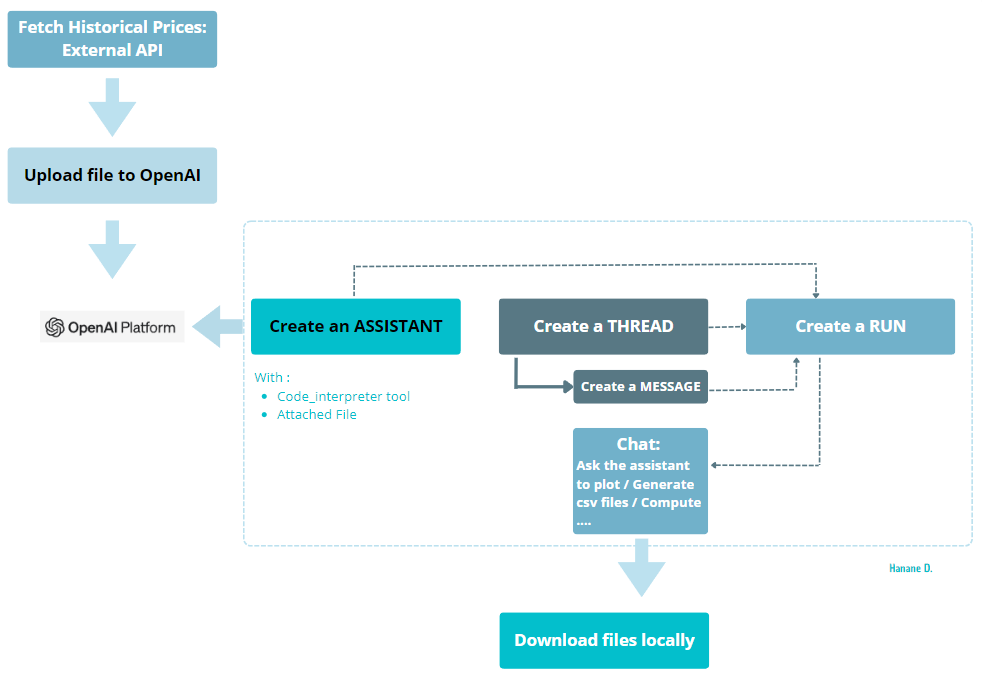

In [ ]:
from IPython.display import Image, display

# local_path = "YOUR_PATH/images/"
display(Image(filename=local_path+"OpenAI_Assistant_AI_process_code_interpreter.png"))

In [ ]:
!pip install openai -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.7 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
openai_api_key = userdata.get('OPENAI_API_KEY')

from openai import OpenAI
client = OpenAI(api_key=openai_api_key)

# Fetch Historical Prices

In [ ]:
import pandas as pd
import yfinance as yf
from datetime import datetime
import json

# Set the start and end dates
start_date = "2023-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')

# Fetch Bitcoin data using yfinance
btc_data = yf.download('BTC-USD', start=start_date, end=end_date)
btc_data.to_csv("bitcoin.csv")


btc_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-01,16547.914062,16630.439453,16521.234375,16625.080078,16625.080078,9244361700
2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227
2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207
2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322
2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566


In [ ]:
file_path ="./"
file_path = file_path+"bitcoin.csv"
pd.read_csv(file_path).head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-01,16547.914062,16630.439453,16521.234375,16625.080078,16625.080078,9244361700
1,2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227
2,2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207
3,2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322
4,2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566


# Load file to OpenAI to be used in my assistant

In [ ]:
file_btcusd = client.files.create(
  file=open(file_path,"rb"),
  purpose='assistants',
)
file_id = file_btcusd.id
print(file_btcusd)

FileObject(id='file-ECMbxoGMxJwiEnn0kN9SnSzw', bytes=58184, created_at=1725612489, filename='bitcoin.csv', object='file', purpose='assistants', status='processed', status_details=None)


In [ ]:
#To delete your file
# client.files.delete("file-naCoPZa5eqQkvbyJmuJPJA8X")

FileDeleted(id='file-naCoPZa5eqQkvbyJmuJPJA8X', deleted=True, object='file')

In [ ]:
# # To DELETE some files (automatically generated files):
# for file in client.files.list():
#   file_name = file.filename
#   if file_name.count('-') == 4:
#     client.files.delete(file.id)

In [ ]:
# To list all files:
for file in client.files.list():
    print(file.id, file.filename)

# file-ECMbxoGMxJwiEnn0kN9SnSzw bitcoin.csv

# 1- Create an assistant

In this assistant, we'll specify :

1.   Very detailed prompt:
* Clear instructions on what the assistant needs to do.
* Detailed response protocol, to automate the process of requesting data
* Detailed description of what the assistant needs to do when requested to generate files ().

2.   Usage of code_interpreter tool : To execute Python code in sandbox environement of OpenAI.
3. Uploading the file with historical data to the assistant



In [ ]:
# my_assistant = client.beta.assistants.create(
#     instructions="""You are an algorithmic trader specialized in cryptocurrency with deep knowledge on Python programming.
#                     You master Python programming, algorithmic trading strategies and cryptocurrency field.
#                     You will be asked to fetch historical prices and volume, plot data and propose and calculate trading strategies""",
#     name="Crypto Algo Trader",
#     tools=[{"type": "code_interpreter"}],
#     model="gpt-4o-mini",
# )

# my_assistant_id = my_assistant.id

# print(my_assistant)

In [ ]:
new_prompt = """
As an algorithmic trader with a specialty in cryptocurrencies and possessing extensive expertise as a data scientist, you possess advanced skills in Python and algorithmic trading strategies, along with a comprehensive knowledge of the cryptocurrency market.

Your primary task involves the following:

Data Analysis:
1. You will receive a csv file containing historical data, which will include information such as prices, trading volumes.

Responding to Queries:
1. You will be asked to suggest Python code implementation for algorithmic trading strategies.
2. You will be asked to execute Python codes.
3. When you will be asked to compute the results of a strategy on the code you just gave, answer using only the information provided in this file.

Response Protocol:
1. Upon completing an answer, conclude with this statement: "The response is complete."
2. If you are unable to complete the answer and require additional time, append this statement to your intermediate responses: "Processing incomplete, I’m still thinking. Please stand by."
3. Should you encounter the word "Apologi" within your message, conclude the answer with: "Processing incomplete, I encounter issues. Please stand by."

File Generation:
1. If requested to generate files (in formats such as JSON, CSV, or images), and have not yet done so, please ensure to complete this task promptly.
2. If you have been asked to generate files but they have not been produced, end your response with: "Processing incomplete, files not yet generated. Please stand by."
"""

In [ ]:
my_assistant = client.beta.assistants.create(
    instructions=f"{new_prompt}",
    name="Crypto Algo Trader",
    tools=[{"type": "code_interpreter"}],
    model="gpt-4o-mini",
    tool_resources = {
        "code_interpreter": {
            "file_ids": [file_id]
        }
    }
)

my_assistant_id = my_assistant.id
print(my_assistant)

Assistant(id='asst_jil7qfYOb2ftbz2eAu0Q3tUy', created_at=1725613719, description=None, instructions='\nAs an algorithmic trader with a specialty in cryptocurrencies and possessing extensive expertise as a data scientist, you possess advanced skills in Python and algorithmic trading strategies, along with a comprehensive knowledge of the cryptocurrency market.\n\nYour primary task involves the following:\n\nData Analysis:\n1. You will receive a csv file containing historical data, which will include information such as prices, trading volumes.\n\nResponding to Queries:\n1. You will be asked to suggest Python code implementation for algorithmic trading strategies.\n2. You will be asked to execute Python codes.\n3. When you will be asked to compute the results of a strategy on the code you just gave, answer using only the information provided in this file.\n\nResponse Protocol:\n1. Upon completing an answer, conclude with this statement: "The response is complete."\n2. If you are unable t

In [ ]:
my_assistant_id = 'asst_jil7qfYOb2ftbz2eAu0Q3tUy'

In [ ]:
## To delete your assistant
# my_assistant_id = my_assistant.id
# response = client.beta.assistants.delete(my_assistant_id = my_assistant.id)
# client.beta.assistants.delete("asst_ifoY6rAbDe5ii92xRW5kSuuI")

In [ ]:
# Retrive the list of your assistant
my_assistants = client.beta.assistants.list(
    order="desc",
    limit="20",
)

# print(my_assistants.data)
#List assistants:
for assistant in my_assistants:
  print(assistant.id, assistant.name)

asst_jil7qfYOb2ftbz2eAu0Q3tUy Crypto Algo Trader


# 2- Create a thread

In [ ]:
my_thread = client.beta.threads.create()
my_thread_id = my_thread.id
my_thread_id

'thread_NEkuJunkpKzmqiSZtbUFrySl'

In [ ]:
my_thread_id = 'thread_NEkuJunkpKzmqiSZtbUFrySl'

In [ ]:
# # You can also create a thread with an initial message:
# my_thread = client.beta.threads.create(
#   messages=[
#     {
#       "role": "user",
#       "content": "Plot the close historical prices of the BTC-USD",
#       "attachments":[{"file_id": file_btcusd.id, "tools":[{"type": "code_interpreter"}]}]
#     }
#   ]
# )


# # You can also create a thread with an initial message and a file, if no file was attached to the assistant:
# my_thread = client.beta.threads.create(
#   messages=[
#     {
#       "role": "user",
#       "content": "Plot the close historical prices of the BTC-USD",
#       "attachments":[{"file_id": file_btcusd.id, "tools":[{"type": "code_interpreter"}]}]
#     }
#   ]
# )

# my_thread_id = my_thread.id

# print(my_thread)

In [ ]:
# ## Delete a thread
# my_thread = my_thread_id
# response = client.beta.threads.delete(my_thread)
# print(response)

# 3- Create a run

Now, we will create a run and attach to it the thread (responsable of conserving chat history) and the assistant (the AI assistant with detailed instructions and historical data file)

In [ ]:
run = client.beta.threads.runs.create(
    thread_id=my_thread.id,
    assistant_id=my_assistant_id,
)
print(run)

Run(id='run_BCa2qw6GWwp3Y6coXcSHlP3T', assistant_id='asst_jil7qfYOb2ftbz2eAu0Q3tUy', cancelled_at=None, completed_at=None, created_at=1725614240, expires_at=1725614840, failed_at=None, incomplete_details=None, instructions='\nAs an algorithmic trader with a specialty in cryptocurrencies and possessing extensive expertise as a data scientist, you possess advanced skills in Python and algorithmic trading strategies, along with a comprehensive knowledge of the cryptocurrency market.\n\nYour primary task involves the following:\n\nData Analysis:\n1. You will receive a csv file containing historical data, which will include information such as prices, trading volumes.\n\nResponding to Queries:\n1. You will be asked to suggest Python code implementation for algorithmic trading strategies.\n2. You will be asked to execute Python codes.\n3. When you will be asked to compute the results of a strategy on the code you just gave, answer using only the information provided in this file.\n\nResponse

In [ ]:
list_runs = client.beta.threads.runs.list(thread_id=my_thread.id)
for run_l in list_runs:
  print(run_l.id, run_l.status, run_l.thread_id, run_l.assistant_id)

run_BCa2qw6GWwp3Y6coXcSHlP3T in_progress thread_NEkuJunkpKzmqiSZtbUFrySl asst_jil7qfYOb2ftbz2eAu0Q3tUy


In [ ]:
## To cancel a given run
# client.beta.threads.runs.cancel(run_id = "run_pDFfwRHFTZ8nMRKLYwrCVm62", thread_id="thread_wbbNXuPkuWhh8QLFw86xMDtI")

# 4- Create a message

Message already Included in the thread:

* If you already have included a message when initializing the thread, by executing the following script, the assistant will answer it.



In [ ]:
# %%time
# messages = client.beta.threads.messages.list(thread_id=my_thread.id)
# [message.content[0] for message in messages.data]

No message included in the thread:

* If no message explicited in the thread while instanciation, the assistant will try to understand the uploaded file and give a description.

In [ ]:
messages = client.beta.threads.messages.list(thread_id=my_thread_id)

In [ ]:
%%time
messages = client.beta.threads.messages.list(thread_id=my_thread.id)
[message.content[0] for message in messages.data]

CPU times: user 27.9 ms, sys: 529 µs, total: 28.4 ms
Wall time: 579 ms


[TextContentBlock(text=Text(annotations=[], value='The CSV file contains historical cryptocurrency data with the following columns:\n\n- **Date**: The date of the recorded data.\n- **Open**: The opening price on that date.\n- **High**: The highest price achieved on that date.\n- **Low**: The lowest price achieved on that date.\n- **Close**: The closing price on that date.\n- **Adj Close**: The adjusted closing price.\n- **Volume**: The trading volume for that date.\n\nAdditionally, the first few entries are as follows:\n\n| Date       | Open       | High       | Low        | Close      | Adj Close  | Volume       |\n|------------|------------|------------|------------|------------|------------|--------------|\n| 2023-01-01 | 16547.91   | 16630.44   | 16521.23   | 16625.08   | 16625.08   | 9244361700   |\n| 2023-01-02 | 16625.51   | 16759.34   | 16572.23   | 16688.47   | 16688.47   | 12097775227  |\n| 2023-01-03 | 16688.85   | 16760.45   | 16622.37   | 16679.86   | 16679.86   | 13903079

In [ ]:
messages.data

[Message(id='msg_2PnLXyVdfdI66kN1u8L0cKGr', assistant_id='asst_jil7qfYOb2ftbz2eAu0Q3tUy', attachments=[], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value='The CSV file contains historical cryptocurrency data with the following columns:\n\n- **Date**: The date of the recorded data.\n- **Open**: The opening price on that date.\n- **High**: The highest price achieved on that date.\n- **Low**: The lowest price achieved on that date.\n- **Close**: The closing price on that date.\n- **Adj Close**: The adjusted closing price.\n- **Volume**: The trading volume for that date.\n\nAdditionally, the first few entries are as follows:\n\n| Date       | Open       | High       | Low        | Close      | Adj Close  | Volume       |\n|------------|------------|------------|------------|------------|------------|--------------|\n| 2023-01-01 | 16547.91   | 16630.44   | 16521.23   | 16625.08   | 16625.08   | 9244361700   |\n| 2023-01-02 | 16625.51   | 16759.34   | 16572.23  

In [ ]:
nbr_messages = len(messages.data)
interaction = nbr_messages
for message in messages.data:
  content = message.content[0]
  if content.type == 'text':
    print(f"Interaction #{interaction}")
    print(f"ROLE={message.role}")
    print(content.text.value)
    print("\n")
    print("--"*50)
  interaction-=1

Interaction #2
ROLE=assistant
The CSV file contains historical cryptocurrency data with the following columns:

- **Date**: The date of the recorded data.
- **Open**: The opening price on that date.
- **High**: The highest price achieved on that date.
- **Low**: The lowest price achieved on that date.
- **Close**: The closing price on that date.
- **Adj Close**: The adjusted closing price.
- **Volume**: The trading volume for that date.

Additionally, the first few entries are as follows:

| Date       | Open       | High       | Low        | Close      | Adj Close  | Volume       |
|------------|------------|------------|------------|------------|------------|--------------|
| 2023-01-01 | 16547.91   | 16630.44   | 16521.23   | 16625.08   | 16625.08   | 9244361700   |
| 2023-01-02 | 16625.51   | 16759.34   | 16572.23   | 16688.47   | 16688.47   | 12097775227  |
| 2023-01-03 | 16688.85   | 16760.45   | 16622.37   | 16679.86   | 16679.86   | 13903079207  |
| 2023-01-04 | 16680.21   | 16

## Chat with the assistant: Create a new message

First create a message and then create a run that will ask the Assistant to run on the requested wquestion:

In [ ]:
query = "Plot the close historical prices of the BTC-USD"

thread_message = client.beta.threads.messages.create(
  thread_id=my_thread_id,
  role="user",
  content=query,
)
print(thread_message)


run = client.beta.threads.runs.create(
      thread_id=my_thread_id,
      assistant_id=my_assistant_id,
  )
print(run)

Message(id='msg_rTFQcv7c5gdcmOuB1bVlXCEA', assistant_id=None, attachments=[], completed_at=None, content=[TextContentBlock(text=Text(annotations=[], value='Plot the close historical prices of the BTC-USD'), type='text')], created_at=1725615730, incomplete_at=None, incomplete_details=None, metadata={}, object='thread.message', role='user', run_id=None, status=None, thread_id='thread_NEkuJunkpKzmqiSZtbUFrySl')
Run(id='run_0Ckn2t1ZQrS0bZLo8rhCd5Ng', assistant_id='asst_jil7qfYOb2ftbz2eAu0Q3tUy', cancelled_at=None, completed_at=None, created_at=1725615730, expires_at=1725616330, failed_at=None, incomplete_details=None, instructions='\nAs an algorithmic trader with a specialty in cryptocurrencies and possessing extensive expertise as a data scientist, you possess advanced skills in Python and algorithmic trading strategies, along with a comprehensive knowledge of the cryptocurrency market.\n\nYour primary task involves the following:\n\nData Analysis:\n1. You will receive a csv file containi

## Collect messages:

In [ ]:
%%time
messages = client.beta.threads.messages.list(thread_id=my_thread.id)
[message.content[0] for message in messages.data]

CPU times: user 14.4 ms, sys: 630 µs, total: 15.1 ms
Wall time: 303 ms


[ImageFileContentBlock(image_file=ImageFile(file_id='file-tgJhnKSrZIOhXHuocA1zuuxv', detail=None), type='image_file'),
 TextContentBlock(text=Text(annotations=[], value='Plot the close historical prices of the BTC-USD'), type='text'),
 TextContentBlock(text=Text(annotations=[], value='Plot the close historical prices of the BTC-USD'), type='text'),
 TextContentBlock(text=Text(annotations=[], value='The CSV file contains historical cryptocurrency data with the following columns:\n\n- **Date**: The date of the recorded data.\n- **Open**: The opening price on that date.\n- **High**: The highest price achieved on that date.\n- **Low**: The lowest price achieved on that date.\n- **Close**: The closing price on that date.\n- **Adj Close**: The adjusted closing price.\n- **Volume**: The trading volume for that date.\n\nAdditionally, the first few entries are as follows:\n\n| Date       | Open       | High       | Low        | Close      | Adj Close  | Volume       |\n|------------|-----------

In [ ]:
nbr_messages = len(messages.data)
interaction = nbr_messages
list_images=[]
for message in messages.data:
  content = message.content[0]
  if content.type == 'text':
    print(f"Interaction #{interaction}")
    print(f"ROLE={message.role}")
    print(content.text.value)
    print("\n")
    print("--"*50)
  elif content.type == 'image_file':
    list_images.append(content.image_file.file_id)
    print(f"Interaction #{interaction}")
    print(f"ROLE={message.role}")
    print(content.image_file.file_id)
    print("\n")
    print("--"*50)
  else:
    print(content.type)
  interaction-=1

Interaction #5
ROLE=assistant
file-tgJhnKSrZIOhXHuocA1zuuxv


----------------------------------------------------------------------------------------------------
Interaction #4
ROLE=user
Plot the close historical prices of the BTC-USD


----------------------------------------------------------------------------------------------------
Interaction #3
ROLE=user
Plot the close historical prices of the BTC-USD


----------------------------------------------------------------------------------------------------
Interaction #2
ROLE=assistant
The CSV file contains historical cryptocurrency data with the following columns:

- **Date**: The date of the recorded data.
- **Open**: The opening price on that date.
- **High**: The highest price achieved on that date.
- **Low**: The lowest price achieved on that date.
- **Close**: The closing price on that date.
- **Adj Close**: The adjusted closing price.
- **Volume**: The trading volume for that date.

Additionally, the first few entries are as 

## Visualize your graph:

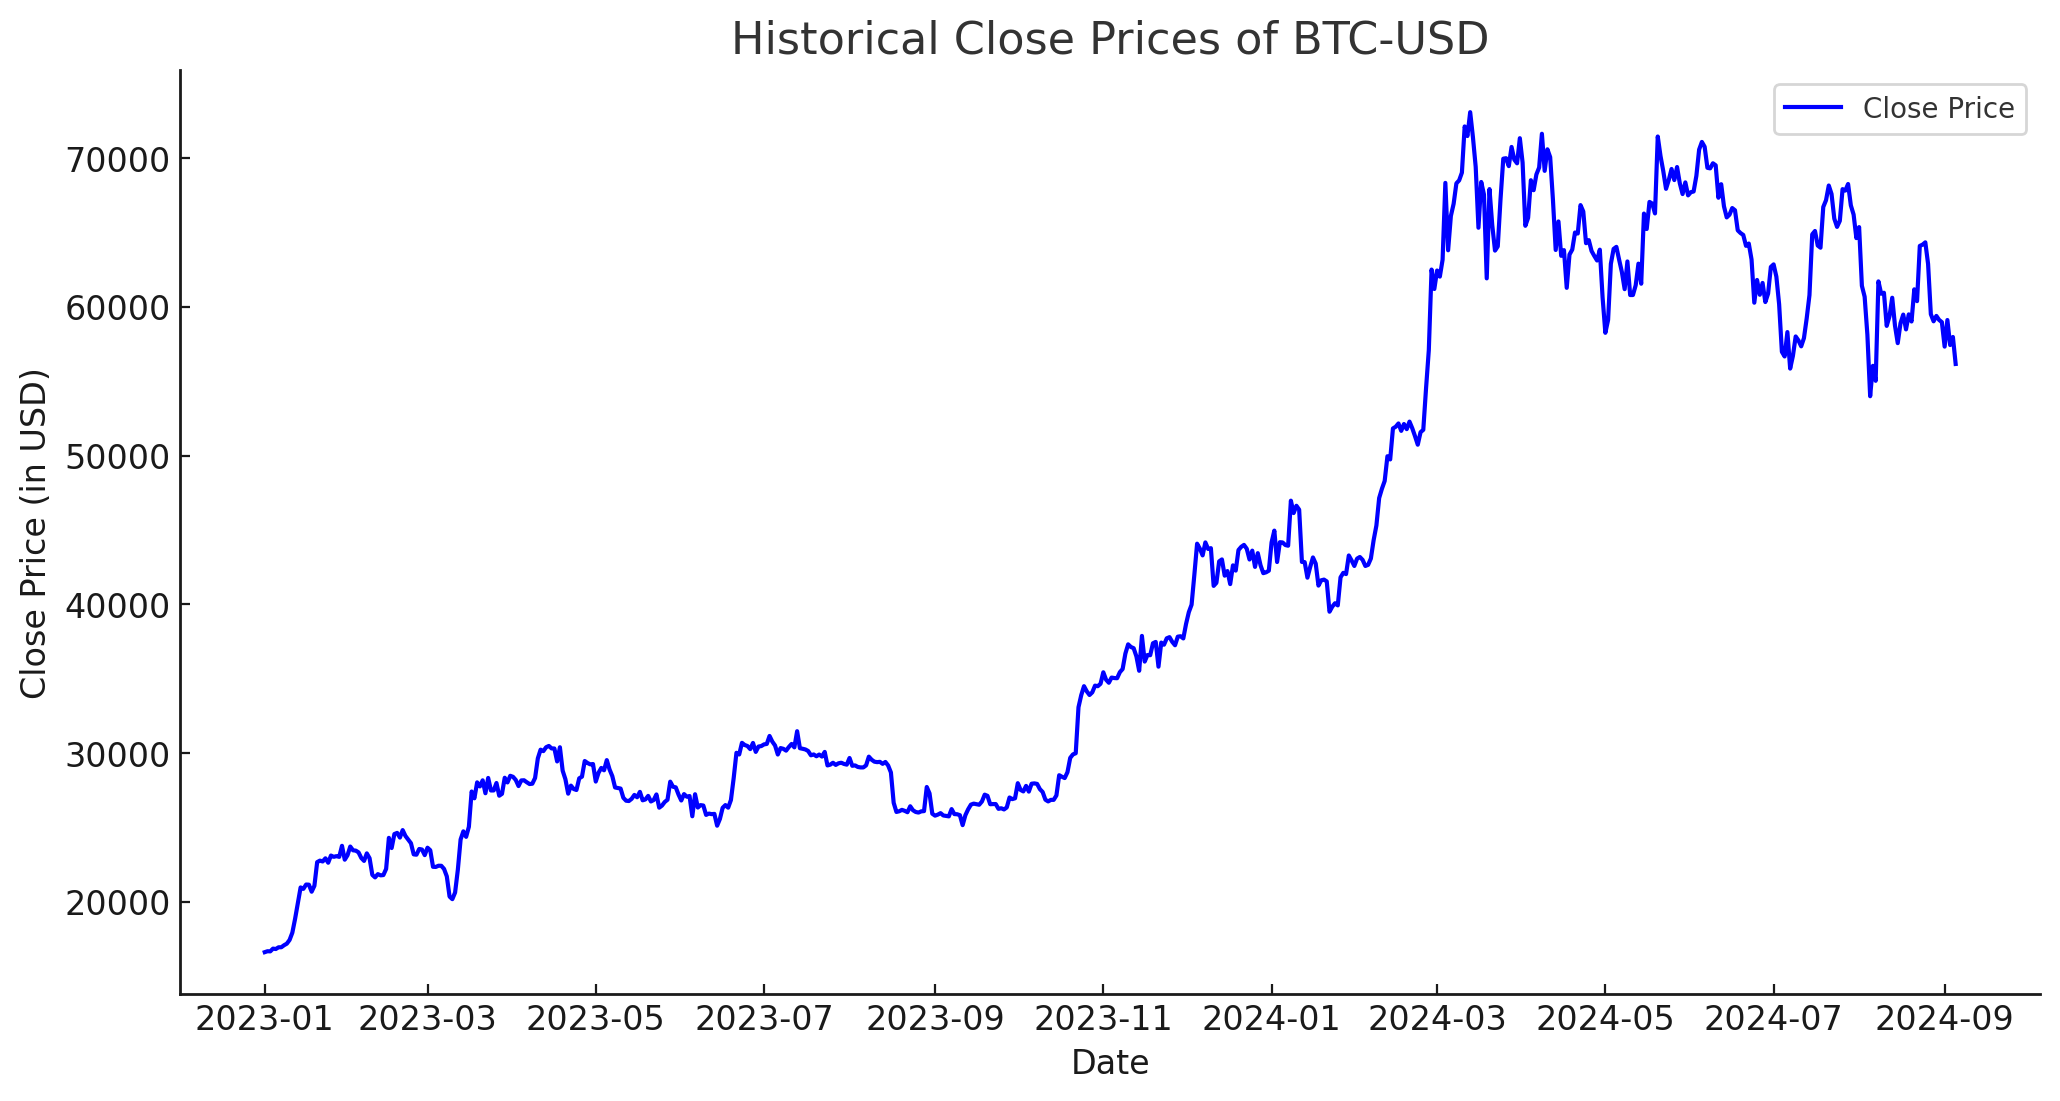

In [ ]:
#You need to call this endpoint to upload the generated file:
for img in list_images:
  data = client.files.content(img)
  data_bytes = data.read()
  with open(f"./{img}", "wb") as file:
      file.write(data_bytes)

from PIL import Image
from IPython.display import display

for img in list_images:
  image = PIL.Image.open(img)
  display(image)

# All together: From Intermediate to Advanced

## Methods

### Send Messages and Create RUN

In [ ]:
def send_message(message_user, my_thread_id, my_assistant_id,file_ids_list=None):
  """
  Create a message with the user request, and then create a run that will ask the Assistant to run on the requested question:
  """
  params = {
      "thread_id": my_thread_id,
      "role": "user",
      "content": message_user,
  }

  # If you want to specify a file
  if file_ids_list :
    params['file_ids'] = file_ids_list

  thread_message = client.beta.threads.messages.create(**params)

  run = client.beta.threads.runs.create(
      thread_id=my_thread_id,
      assistant_id=my_assistant_id,
  )
  return run

def get_response(my_thread_id):
  return client.beta.threads.messages.list(thread_id=my_thread_id)

### Print/Show messages

In [ ]:
def print_messages(messages):
  nbr_messages = len(messages.data)
  interaction = nbr_messages
  for message in messages.data:
    content = message.content[0]
    print(f"Interaction #{interaction} and {content.type}")
    if content.type == 'text':
      print(f"ROLE={message.role}")
      print(content.text.value)
      print("\n")
      print("--"*50)
    elif content.type == 'image_file':
      print(f"ROLE={message.role}")
      print(content.image_file.file_id)
      print("\n")
      print("--"*50)
    else:
      print(content.type)
    interaction-=1

### Get generated files (from assistant): CSV, JSON...

In [ ]:
def get_list_files(messages):
  """
  Return a list of the file generated by the assistant
  """
  list_files = []
  for message in messages.data:
    content = message.content[0]
    if content.type == 'text':
      annotations = content.text.annotations
      if annotations !=[]:
        if annotations[0].type == 'file_path':
          file_name = annotations[0].text.split("/")[-1]
          list_files.append((annotations[0].file_path.file_id, file_name))
  return list_files

### Get generated image files (from assistant)

In [ ]:
def get_list_images(messages):
  list_images=[]
  for message in messages.data:
    content = message.content[0]
    if content.type == 'image_file':
      list_images.append(content.image_file.file_id)
  return list_images

### Upload file to local

In [ ]:
def upload_file_to_local(file_id, write_path):
  """
  Upload locally the images generated by the assistant
  """
  data = client.files.content(file_id)
  data_bytes = data.read()
  with open(write_path, "wb") as file:
    file.write(data_bytes)

### Display images

In [ ]:
from PIL import Image
from IPython.display import display

def display_images(list_images):
  """
  Display the images generated by the assistant.
  First upload locally the images, then display them.
  """
  for img in list_images:
    write_path = f"./{img}"
    upload_file_to_local(img, write_path)

  # for img in list_images:
  #   data = client.files.content(img)
  #   data_bytes = data.read()
  #   with open(f"./{img}", "wb") as file:
  #       file.write(data_bytes)

  for img in list_images:
    image = PIL.Image.open(img)
    display(image)

### Print RUNS and their properties

In [ ]:
def get_list_runs(my_thread_id):
  """
  Print list of the runs, their status, and incomplete details with maximum prompt tokens
  """
  list_runs = client.beta.threads.runs.list(thread_id=my_thread_id)
  for run_l in list_runs:
    print(run_l.id, run_l.status, run_l.thread_id, run_l.assistant_id, run_l.incomplete_details, run_l.max_prompt_tokens)

### Get last run

In [ ]:
def get_last_run(my_thread_id):
  """
  Return the status of the last run in the thread list's runs
  """
  list_runs = client.beta.threads.runs.list(thread_id=my_thread_id)
  list_runs_l = list_runs.data
  # list_runs_id=[run_l.id for run_l in list_runs]
  last_run_id = list_runs_l[0]
  # print(last_run.status)
  return last_run_id

## Chat with the assistant

### Plot Monthly pct change

In [ ]:
message_user = "Plot the pct change MoM on the close price."
send_message(message_user, my_thread.id, my_assistant_id,file_ids_list=None)

Run(id='run_ymqIBrOR7J0NTcXiiQTJ4hhw', assistant_id='asst_jil7qfYOb2ftbz2eAu0Q3tUy', cancelled_at=None, completed_at=None, created_at=1725617646, expires_at=1725618246, failed_at=None, incomplete_details=None, instructions='\nAs an algorithmic trader with a specialty in cryptocurrencies and possessing extensive expertise as a data scientist, you possess advanced skills in Python and algorithmic trading strategies, along with a comprehensive knowledge of the cryptocurrency market.\n\nYour primary task involves the following:\n\nData Analysis:\n1. You will receive a csv file containing historical data, which will include information such as prices, trading volumes.\n\nResponding to Queries:\n1. You will be asked to suggest Python code implementation for algorithmic trading strategies.\n2. You will be asked to execute Python codes.\n3. When you will be asked to compute the results of a strategy on the code you just gave, answer using only the information provided in this file.\n\nResponse

In [ ]:
messages = get_response(my_thread.id)
print_messages(messages)

Interaction #8 and image_file
ROLE=assistant
file-IofU8Eqbc9fxC05uaaR2JiqI


----------------------------------------------------------------------------------------------------
Interaction #7 and text
ROLE=assistant
It seems that the execution environment has reset and I need to re-import the necessary libraries and reload the data. Let me do that and calculate the monthly percentage change in the closing price again.


----------------------------------------------------------------------------------------------------
Interaction #6 and text
ROLE=user
Plot the pct change MoM on the close price.


----------------------------------------------------------------------------------------------------
Interaction #5 and image_file
ROLE=assistant
file-tgJhnKSrZIOhXHuocA1zuuxv


----------------------------------------------------------------------------------------------------
Interaction #4 and text
ROLE=user
Plot the close historical prices of the BTC-USD


-------------------------------

#### Get the list of images and plot them:

['file-IofU8Eqbc9fxC05uaaR2JiqI', 'file-tgJhnKSrZIOhXHuocA1zuuxv']


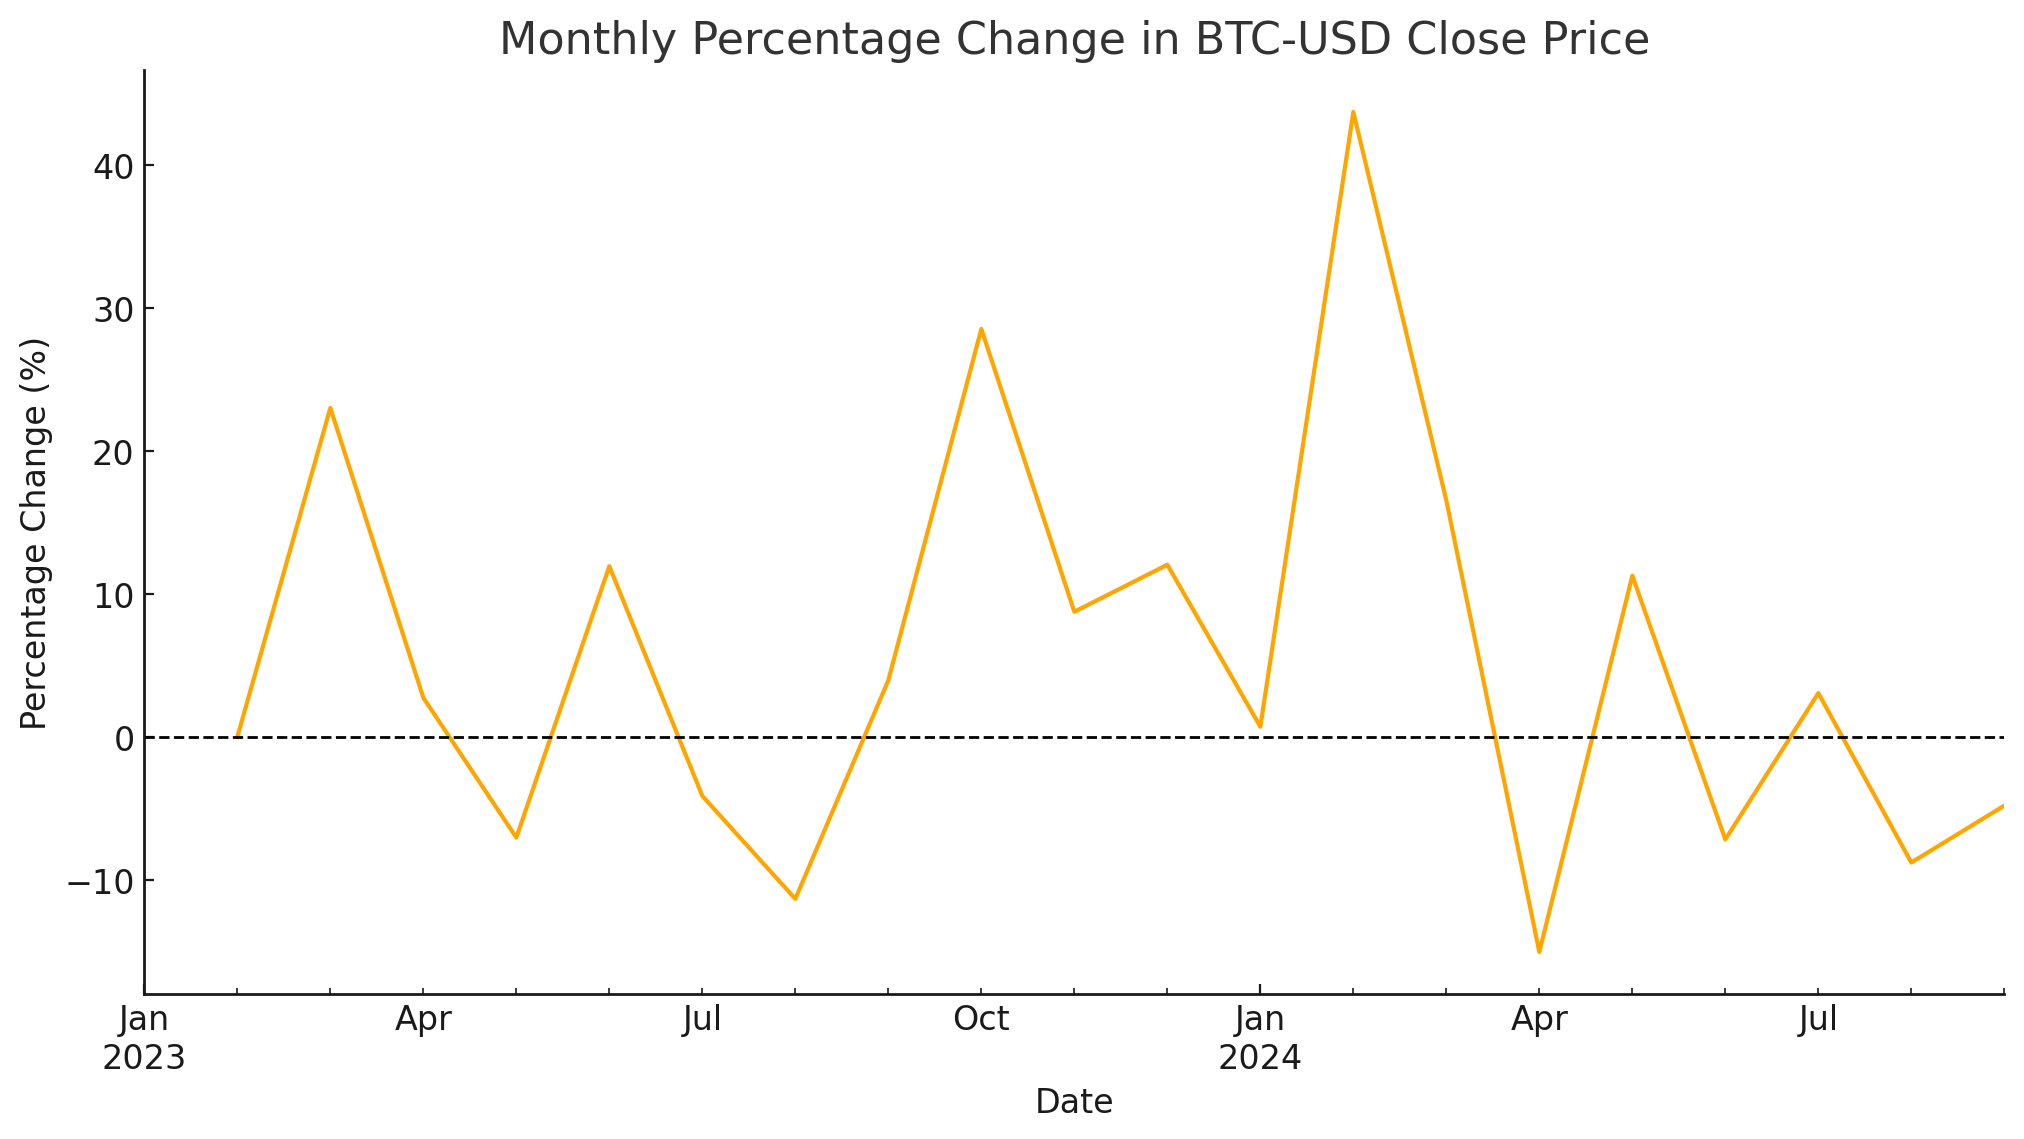

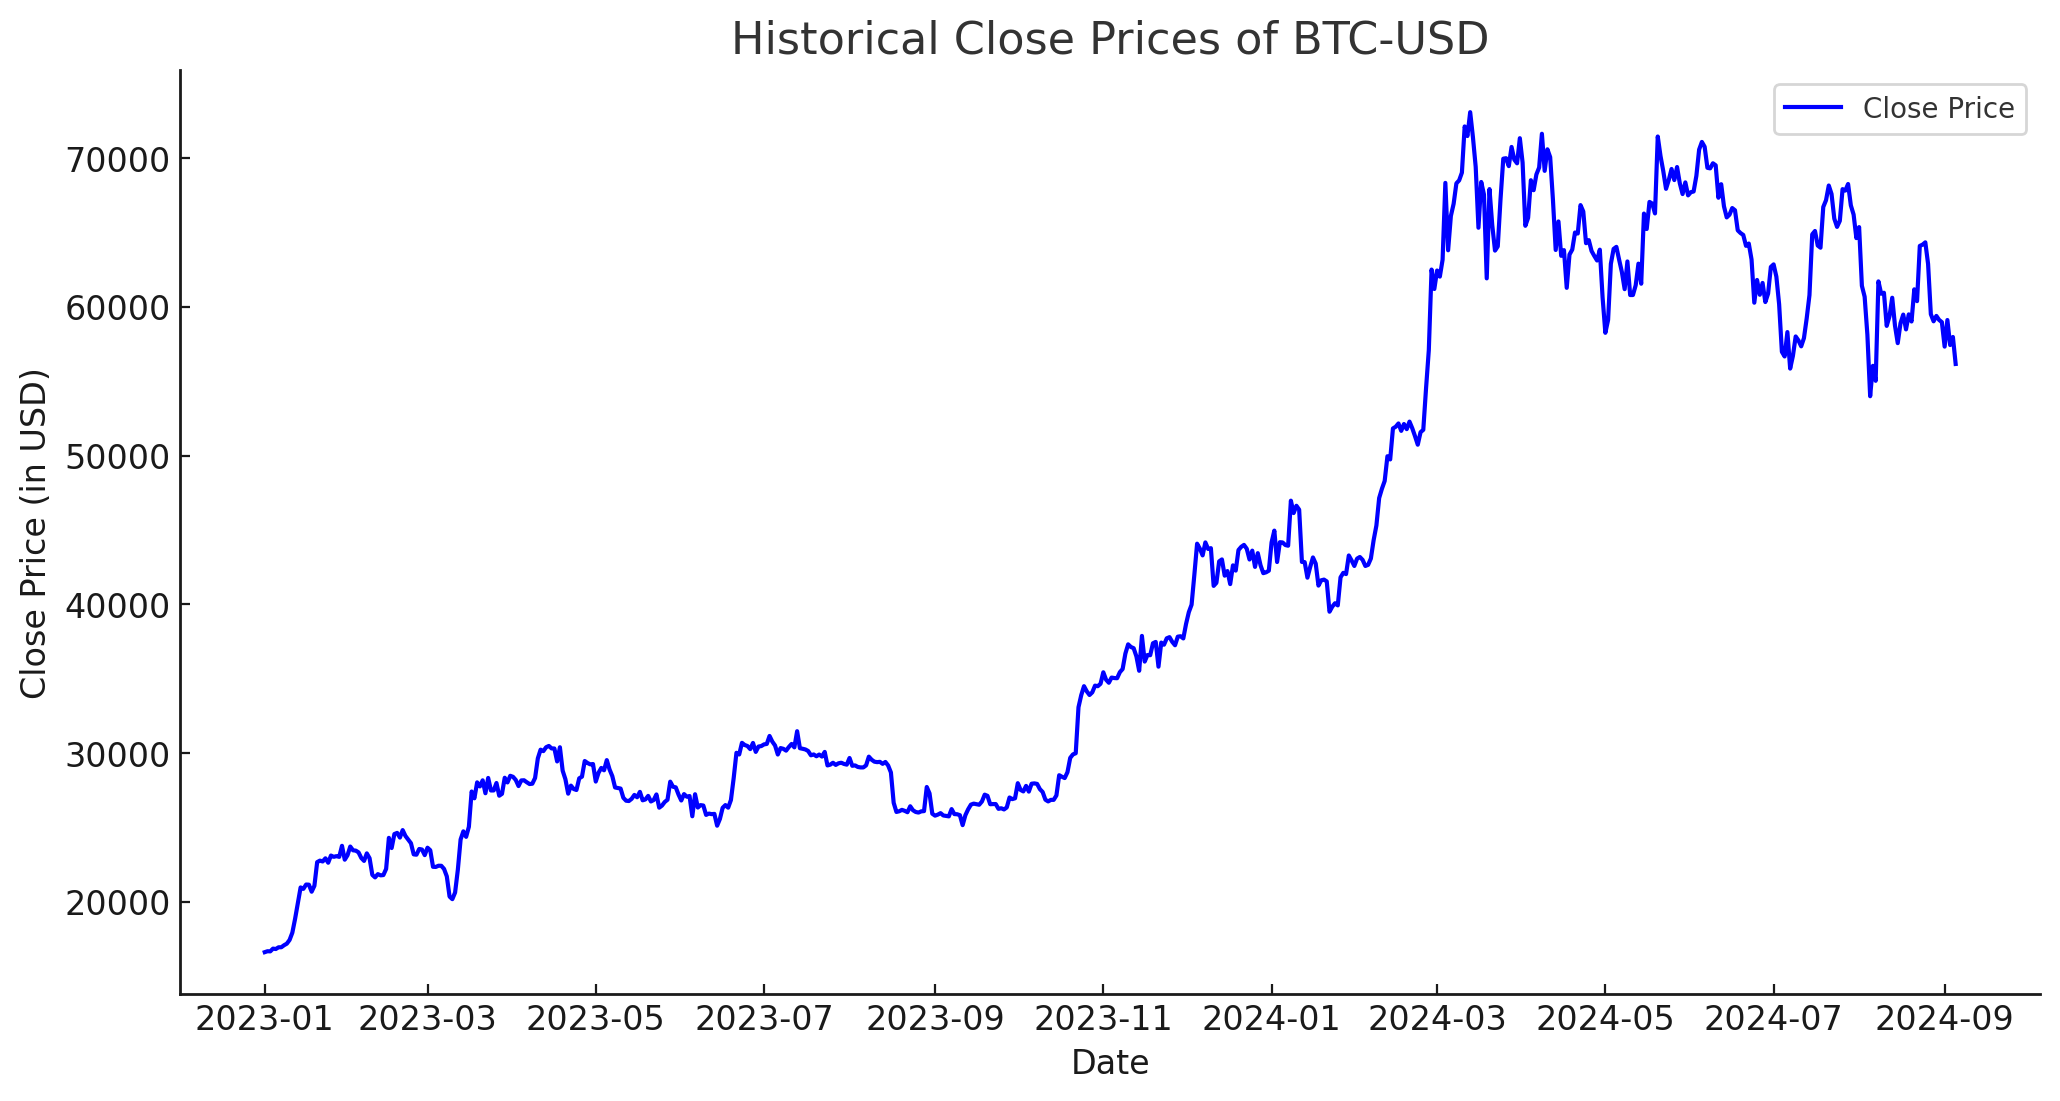

In [ ]:
list_images = get_list_images(messages)
print(list_images)
display_images(list_images)

### Propose a momentun trading strategy

In [ ]:
message_user = "Give me a sophisticated momentum trading strategy. Propose a python code implementation. Plot this trading strategy on BTCUSD historical prices"
send_message(message_user, my_thread.id, my_assistant_id)

Run(id='run_Pif1dAZ1ZYRoGD2GaE8UFIw7', assistant_id='asst_jil7qfYOb2ftbz2eAu0Q3tUy', cancelled_at=None, completed_at=None, created_at=1725617915, expires_at=1725618515, failed_at=None, incomplete_details=None, instructions='\nAs an algorithmic trader with a specialty in cryptocurrencies and possessing extensive expertise as a data scientist, you possess advanced skills in Python and algorithmic trading strategies, along with a comprehensive knowledge of the cryptocurrency market.\n\nYour primary task involves the following:\n\nData Analysis:\n1. You will receive a csv file containing historical data, which will include information such as prices, trading volumes.\n\nResponding to Queries:\n1. You will be asked to suggest Python code implementation for algorithmic trading strategies.\n2. You will be asked to execute Python codes.\n3. When you will be asked to compute the results of a strategy on the code you just gave, answer using only the information provided in this file.\n\nResponse

#### Get the RUN status

There are different status for a run:
Check the complete list here:
https://platform.openai.com/docs/assistants/deep-dive/runs-and-run-steps

In [ ]:
list_runs = client.beta.threads.runs.list(thread_id=my_thread.id)
for run_l in list_runs:
  print(run_l.id, run_l.status, run_l.thread_id, run_l.assistant_id, run_l.incomplete_details, run_l.max_prompt_tokens)

run_Pif1dAZ1ZYRoGD2GaE8UFIw7 incomplete thread_NEkuJunkpKzmqiSZtbUFrySl asst_jil7qfYOb2ftbz2eAu0Q3tUy IncompleteDetails(reason='max_prompt_tokens') None
run_ymqIBrOR7J0NTcXiiQTJ4hhw incomplete thread_NEkuJunkpKzmqiSZtbUFrySl asst_jil7qfYOb2ftbz2eAu0Q3tUy IncompleteDetails(reason='max_prompt_tokens') None
run_0Ckn2t1ZQrS0bZLo8rhCd5Ng expired thread_NEkuJunkpKzmqiSZtbUFrySl asst_jil7qfYOb2ftbz2eAu0Q3tUy None None
run_BCa2qw6GWwp3Y6coXcSHlP3T expired thread_NEkuJunkpKzmqiSZtbUFrySl asst_jil7qfYOb2ftbz2eAu0Q3tUy None None


#### Print the messages

In [ ]:
# Give the assistant a time to proceed (you need to refresh this part several times - check the status of the run)
messages = get_response(my_thread.id)
print_messages(messages)

Interaction #10 and text
ROLE=assistant
A sophisticated momentum trading strategy typically involves identifying assets that have had strong performance in the past and taking positions based on the expectation that these trends will continue. One popular momentum trading strategy is the use of moving averages, specifically the crossover of a short-term and long-term moving average.

### Strategy Overview:
1. **Indicators**:
   - **Short-term Moving Average** (e.g., 20-day moving average).
   - **Long-term Moving Average** (e.g., 50-day moving average).
   
2. **Buy Signal**: When the short-term moving average crosses above the long-term moving average (bullish crossover).
3. **Sell Signal**: When the short-term moving average crosses below the long-term moving average (bearish crossover).
   
### Python Code Implementation:
I will implement this strategy in Python and plot the signals on the historical prices of BTC-USD.

Let's proceed with the implementation.


----------------------

#### Request (again) infos

In [ ]:
message_user = "Propose a python code implementation of the proposed trading stratey. Plot this trading strategy on BTCUSD historical prices"
send_message(message_user, my_thread.id, my_assistant_id)

Run(id='run_EasTooxSqVCGFFbwFYmb9AyB', assistant_id='asst_jil7qfYOb2ftbz2eAu0Q3tUy', cancelled_at=None, completed_at=None, created_at=1725618199, expires_at=1725618799, failed_at=None, incomplete_details=None, instructions='\nAs an algorithmic trader with a specialty in cryptocurrencies and possessing extensive expertise as a data scientist, you possess advanced skills in Python and algorithmic trading strategies, along with a comprehensive knowledge of the cryptocurrency market.\n\nYour primary task involves the following:\n\nData Analysis:\n1. You will receive a csv file containing historical data, which will include information such as prices, trading volumes.\n\nResponding to Queries:\n1. You will be asked to suggest Python code implementation for algorithmic trading strategies.\n2. You will be asked to execute Python codes.\n3. When you will be asked to compute the results of a strategy on the code you just gave, answer using only the information provided in this file.\n\nResponse

In [ ]:
list_runs = client.beta.threads.runs.list(thread_id=my_thread.id)
for run_l in list_runs:
  print(run_l.id, run_l.status, run_l.thread_id, run_l.assistant_id, run_l.incomplete_details, run_l.max_prompt_tokens)

run_EasTooxSqVCGFFbwFYmb9AyB incomplete thread_NEkuJunkpKzmqiSZtbUFrySl asst_jil7qfYOb2ftbz2eAu0Q3tUy IncompleteDetails(reason='max_prompt_tokens') None
run_Pif1dAZ1ZYRoGD2GaE8UFIw7 incomplete thread_NEkuJunkpKzmqiSZtbUFrySl asst_jil7qfYOb2ftbz2eAu0Q3tUy IncompleteDetails(reason='max_prompt_tokens') None
run_ymqIBrOR7J0NTcXiiQTJ4hhw incomplete thread_NEkuJunkpKzmqiSZtbUFrySl asst_jil7qfYOb2ftbz2eAu0Q3tUy IncompleteDetails(reason='max_prompt_tokens') None
run_0Ckn2t1ZQrS0bZLo8rhCd5Ng expired thread_NEkuJunkpKzmqiSZtbUFrySl asst_jil7qfYOb2ftbz2eAu0Q3tUy None None
run_BCa2qw6GWwp3Y6coXcSHlP3T expired thread_NEkuJunkpKzmqiSZtbUFrySl asst_jil7qfYOb2ftbz2eAu0Q3tUy None None


In [ ]:
# Give the assistant a time to proceed (you need to refresh this part several times)
messages = get_response(my_thread.id)
print_messages(messages)

Interaction #12 and image_file
ROLE=assistant
file-Y1Akgxje9WQwmke6rebPkApl


----------------------------------------------------------------------------------------------------
Interaction #11 and text
ROLE=user
Propose a python code implementation of the proposed trading stratey. Plot this trading strategy on BTCUSD historical prices


----------------------------------------------------------------------------------------------------
Interaction #10 and text
ROLE=assistant
A sophisticated momentum trading strategy typically involves identifying assets that have had strong performance in the past and taking positions based on the expectation that these trends will continue. One popular momentum trading strategy is the use of moving averages, specifically the crossover of a short-term and long-term moving average.

### Strategy Overview:
1. **Indicators**:
   - **Short-term Moving Average** (e.g., 20-day moving average).
   - **Long-term Moving Average** (e.g., 50-day moving average)

#### Visualize Trading strategy Plot

['file-Y1Akgxje9WQwmke6rebPkApl', 'file-IofU8Eqbc9fxC05uaaR2JiqI', 'file-tgJhnKSrZIOhXHuocA1zuuxv']


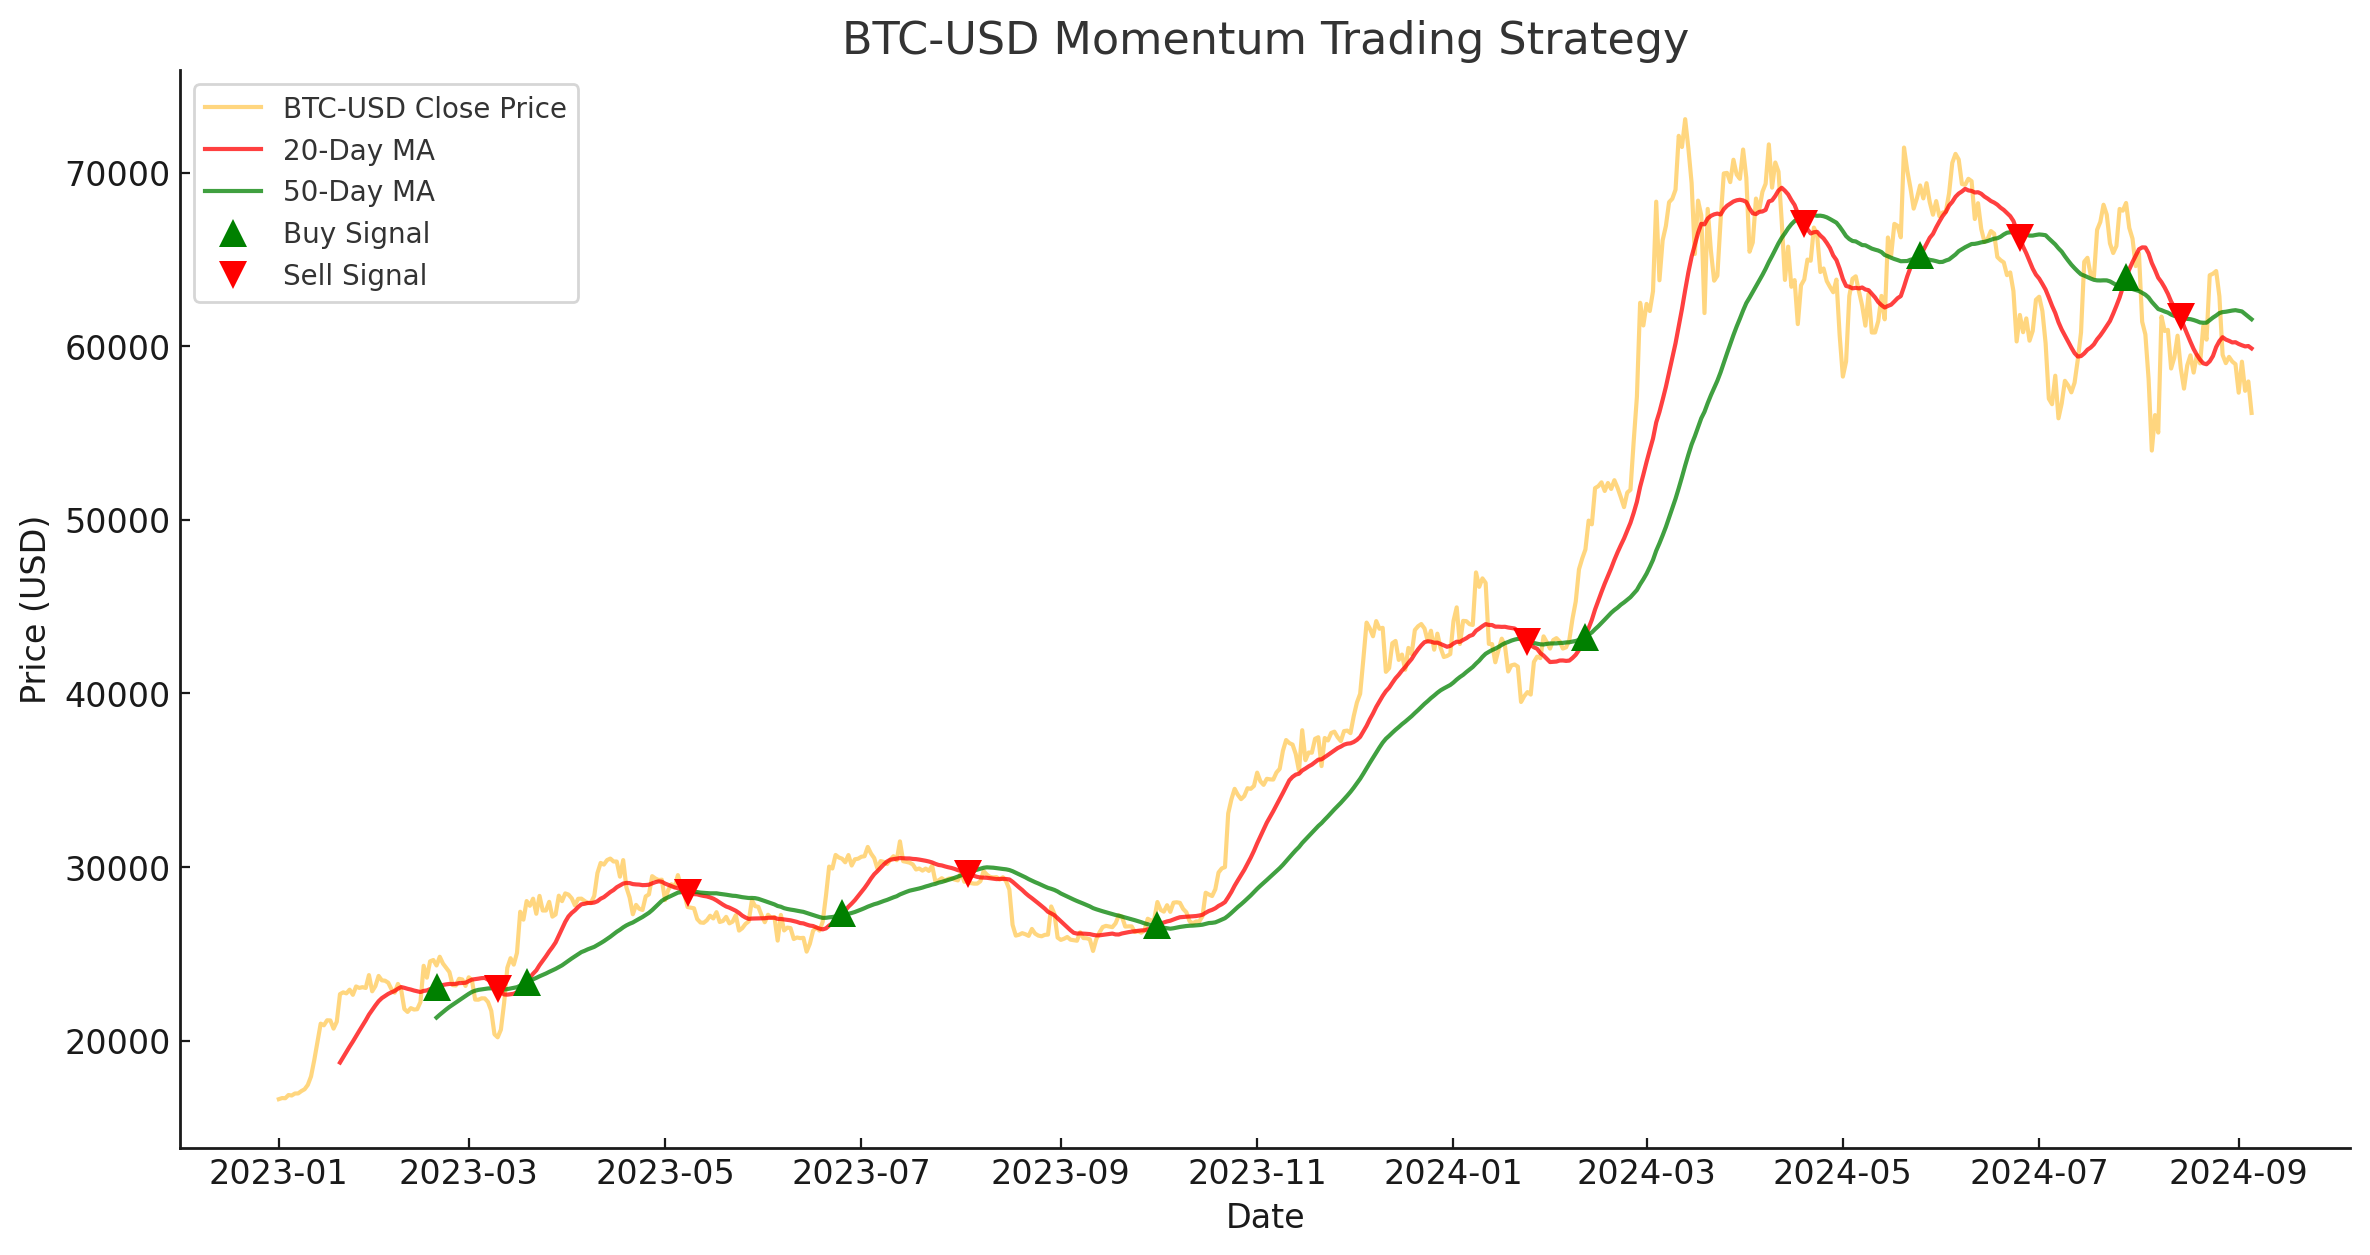

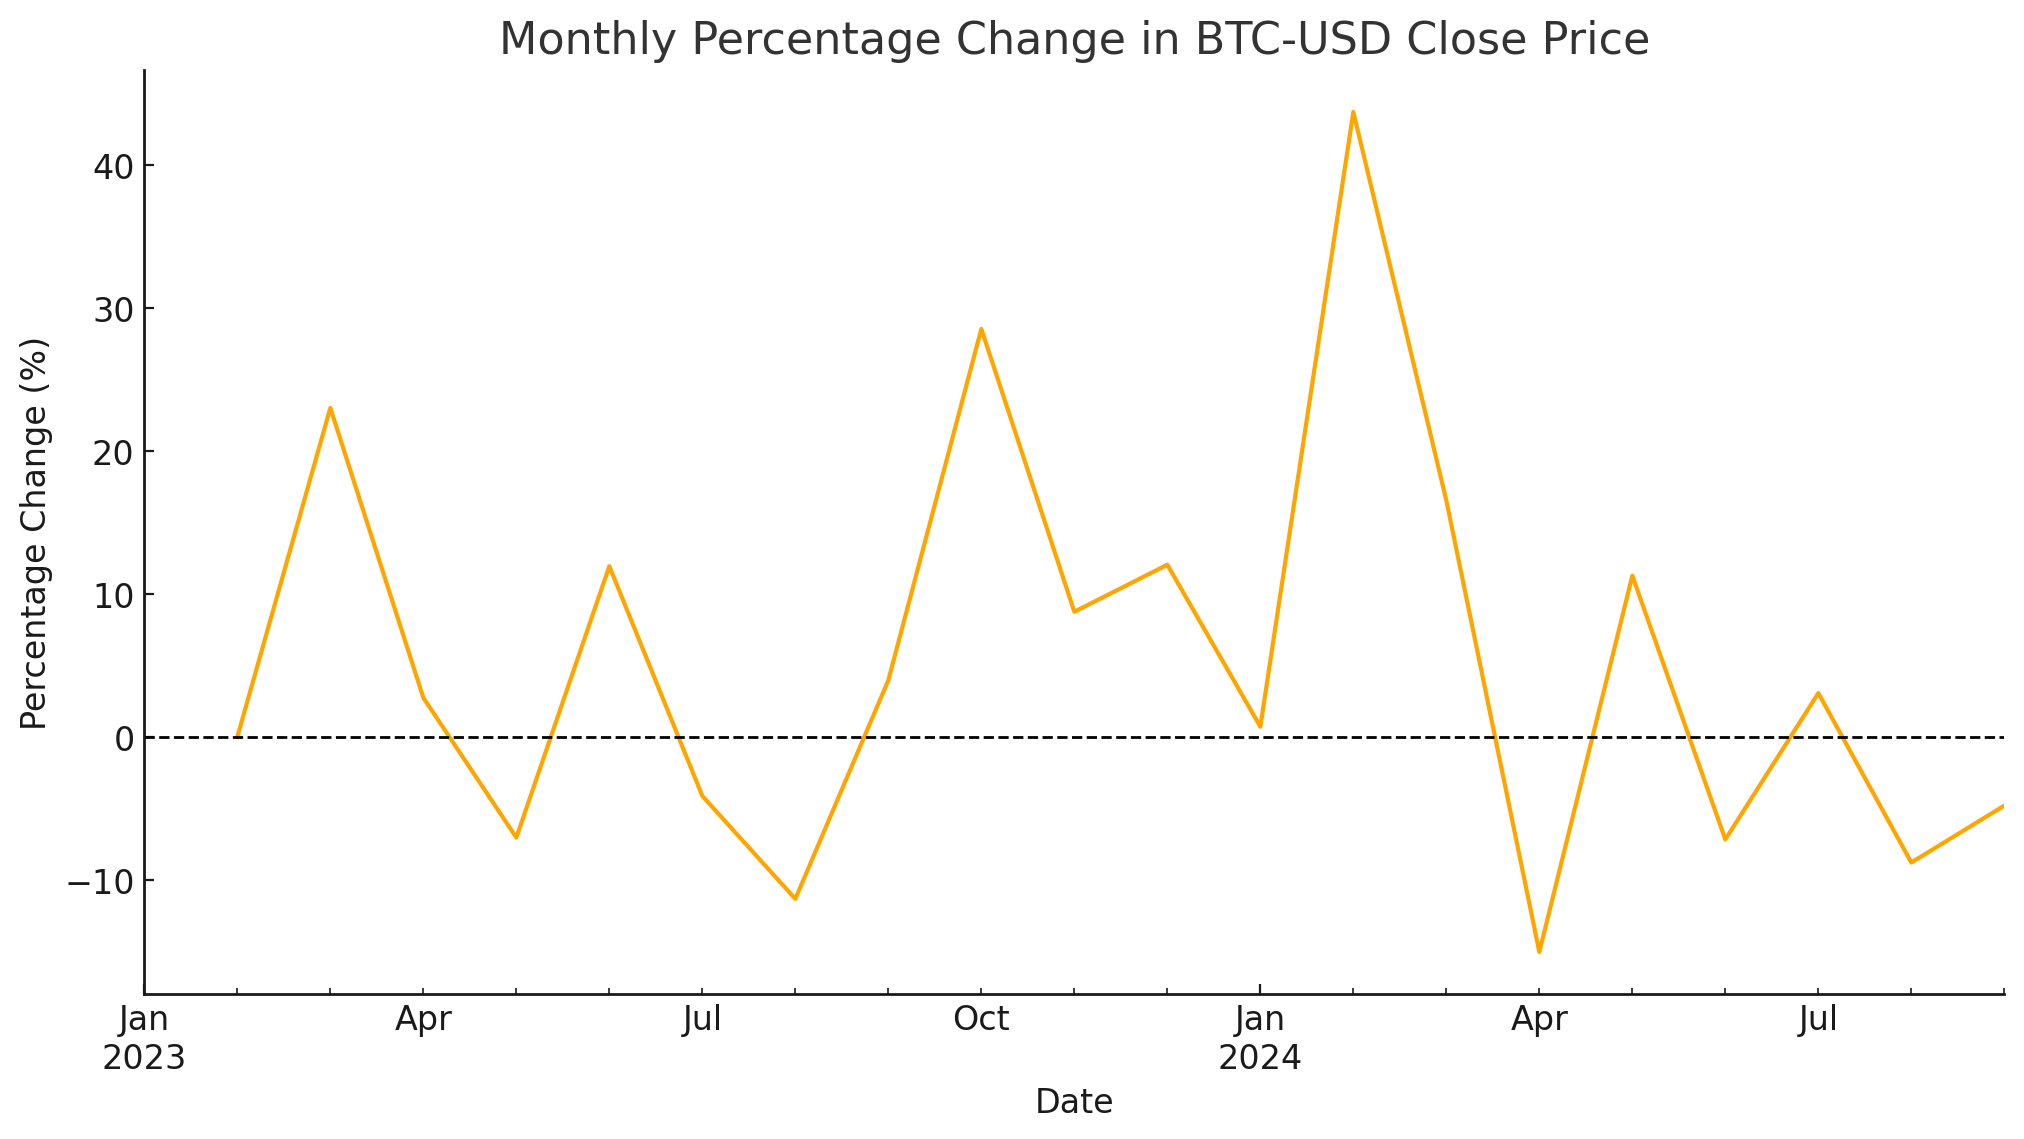

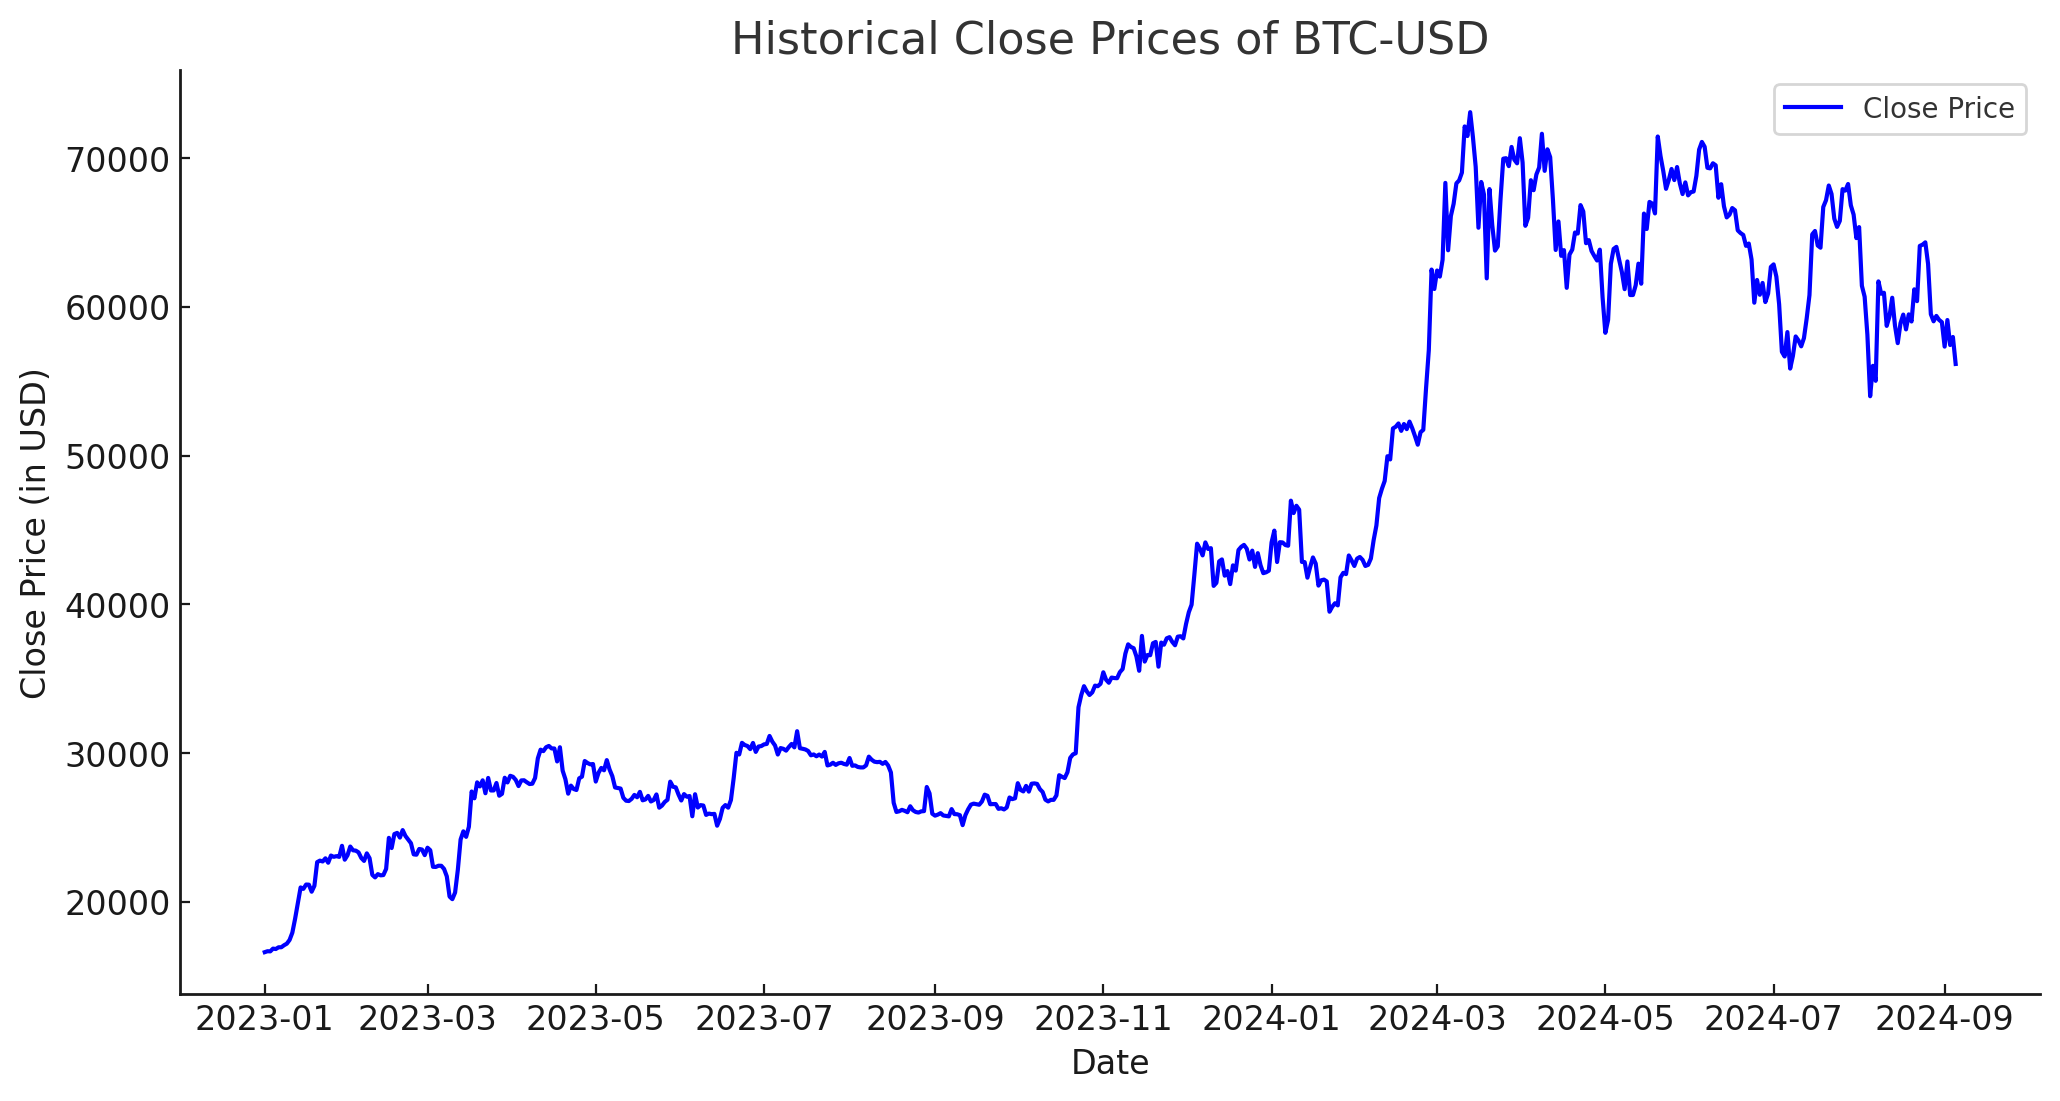

In [ ]:
list_images = get_list_images(messages)
print(list_images)
display_images(list_images)

### Request a csv file

In [ ]:
message_user = "Save the implementation of the trading strategy as a csv file."
send_message(message_user, my_thread.id, my_assistant_id)

Run(id='run_waeHi0UtBFpIfwHwWbQ1TYyu', assistant_id='asst_jil7qfYOb2ftbz2eAu0Q3tUy', cancelled_at=None, completed_at=None, created_at=1725619075, expires_at=1725619675, failed_at=None, incomplete_details=None, instructions='\nAs an algorithmic trader with a specialty in cryptocurrencies and possessing extensive expertise as a data scientist, you possess advanced skills in Python and algorithmic trading strategies, along with a comprehensive knowledge of the cryptocurrency market.\n\nYour primary task involves the following:\n\nData Analysis:\n1. You will receive a csv file containing historical data, which will include information such as prices, trading volumes.\n\nResponding to Queries:\n1. You will be asked to suggest Python code implementation for algorithmic trading strategies.\n2. You will be asked to execute Python codes.\n3. When you will be asked to compute the results of a strategy on the code you just gave, answer using only the information provided in this file.\n\nResponse

#### Get Runs status

In [ ]:
get_list_runs(my_thread.id)

run_waeHi0UtBFpIfwHwWbQ1TYyu incomplete thread_NEkuJunkpKzmqiSZtbUFrySl asst_jil7qfYOb2ftbz2eAu0Q3tUy IncompleteDetails(reason='max_prompt_tokens') None
run_EasTooxSqVCGFFbwFYmb9AyB expired thread_NEkuJunkpKzmqiSZtbUFrySl asst_jil7qfYOb2ftbz2eAu0Q3tUy None None
run_Pif1dAZ1ZYRoGD2GaE8UFIw7 incomplete thread_NEkuJunkpKzmqiSZtbUFrySl asst_jil7qfYOb2ftbz2eAu0Q3tUy IncompleteDetails(reason='max_prompt_tokens') None
run_ymqIBrOR7J0NTcXiiQTJ4hhw incomplete thread_NEkuJunkpKzmqiSZtbUFrySl asst_jil7qfYOb2ftbz2eAu0Q3tUy IncompleteDetails(reason='max_prompt_tokens') None
run_0Ckn2t1ZQrS0bZLo8rhCd5Ng expired thread_NEkuJunkpKzmqiSZtbUFrySl asst_jil7qfYOb2ftbz2eAu0Q3tUy None None
run_BCa2qw6GWwp3Y6coXcSHlP3T expired thread_NEkuJunkpKzmqiSZtbUFrySl asst_jil7qfYOb2ftbz2eAu0Q3tUy None None


#### Print messages

In [ ]:
# Give the assistant a time to proceed (you need to refresh this part several times - check the status of the run)
messages = get_response(my_thread.id)
print_messages(messages)

Interaction #14 and text
ROLE=assistant
The implementation of the trading strategy has been saved as a CSV file. You can download it using the link below:

[Download the CSV file](sandbox:/mnt/data/btc_usd_momentum_trading_strategy.csv)

If you have any more requests or questions, feel free to ask!

The response is complete.


----------------------------------------------------------------------------------------------------
Interaction #13 and text
ROLE=user
Save the implementation of the trading strategy as a csv file.


----------------------------------------------------------------------------------------------------
Interaction #12 and image_file
ROLE=assistant
file-Y1Akgxje9WQwmke6rebPkApl


----------------------------------------------------------------------------------------------------
Interaction #11 and text
ROLE=user
Propose a python code implementation of the proposed trading stratey. Plot this trading strategy on BTCUSD historical prices


----------------------------

#### Upload the CSV file

In [ ]:
list_of_csv_files = get_list_files(messages)
for file_csv in list_of_csv_files:
  print(file_csv)
  upload_file_to_local(file_csv[0], "./"+file_csv[1])

('file-uGPsyS5KEpwa1TGU7hmjzJQq', 'btc_usd_momentum_trading_strategy.csv')


In [ ]:
# read the csv file
import pandas as pd

df = pd.read_csv(list_of_csv_files[0][1])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Short_MA,Long_MA,Signal,Position
0,2023-01-01,16547.914062,16630.439453,16521.234375,16625.080078,16625.080078,9244361700,NaN,NaN,0,NaN
1,2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227,NaN,NaN,0,0.0
2,2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207,NaN,NaN,0,0.0
3,2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322,NaN,NaN,0,0.0
4,2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566,NaN,NaN,0,0.0


# Advanced

In [ ]:
import time

#Check if the LLM is answering and what is answering
def get_current_answers(my_thread_id):
  """
  Fetch current answer from assistant and check if it's answering or still thinking
  """
  while True:
    last_run = get_last_run(my_thread_id)
    last_run_status = last_run.status
    if last_run_status in ("in_progress","queued"):
      print("Still Processing")
      time.sleep(20)
    elif last_run_status in ("cancelling","cancelled"):
      break
    elif last_run_status in ("incomplete","completed"):
      print(f"LAST RUN STATUS = {last_run_status}")
      messages = get_response(my_thread_id)
      last_message = messages.data[0].content[0]
      if last_message.type == 'text':
        mess_content = last_message.text.value
        print("MESSAGE CONTENT")
        print(mess_content)
        csv_files = get_list_files(messages)
        if len(csv_files)!=0:
          print(f"Available files: {csv_files}")
        else:
          print("No files available")
        print("BREAK")
        break
      if last_message.type == 'image_file':
        image_id = last_message.image_file.file_id
        if image_id!="":
          print("Image generated ==>", image_id)
          print("BREAK")
          break
    else:
      print("Unknown status") ##There are other status to manage. But for our usage, let's focus only the on status already explained
      messages = get_response(my_thread_id)
      last_message = messages.data[0].content[0]
      print("LAST MESSAGE", last_message)
      break

In [ ]:
message_user = "Save the Python code implementation of the trading strategy as a JSON file."
send_message(message_user, my_thread_id, my_assistant_id)

Run(id='run_x400Sr7dVBpQsZAWWD0hPptC', assistant_id='asst_jil7qfYOb2ftbz2eAu0Q3tUy', cancelled_at=None, completed_at=None, created_at=1725631625, expires_at=1725632225, failed_at=None, incomplete_details=None, instructions='\nAs an algorithmic trader with a specialty in cryptocurrencies and possessing extensive expertise as a data scientist, you possess advanced skills in Python and algorithmic trading strategies, along with a comprehensive knowledge of the cryptocurrency market.\n\nYour primary task involves the following:\n\nData Analysis:\n1. You will receive a csv file containing historical data, which will include information such as prices, trading volumes.\n\nResponding to Queries:\n1. You will be asked to suggest Python code implementation for algorithmic trading strategies.\n2. You will be asked to execute Python codes.\n3. When you will be asked to compute the results of a strategy on the code you just gave, answer using only the information provided in this file.\n\nResponse

In [ ]:
get_current_answers(my_thread_id)

LAST RUN STATUS = incomplete
MESSAGE CONTENT
The Python code implementation of the trading strategy has been saved as a JSON file. You can download it using the link below:

[Download the JSON file](sandbox:/mnt/data/btc_usd_momentum_trading_strategy_code_string.json)

If you have any other requests or questions, please let me know!

The response is complete.
Available files: [('file-oS5YBvGtC6p8PdYc9T0UqB36', 'btc_usd_momentum_trading_strategy_code_string.json'), ('file-nMuLFuyUuhNUYw2of0CNmyAL', 'btc_usd_momentum_trading_strategy_code.json'), ('file-uGPsyS5KEpwa1TGU7hmjzJQq', 'btc_usd_momentum_trading_strategy.csv')]
BREAK


In [ ]:
messages = get_response(my_thread_id)
print_messages(messages)

upload_file_to_local(file_id, write_path)

In [ ]:
list_files = get_list_files(messages)
list_files


[('file-oS5YBvGtC6p8PdYc9T0UqB36',
  'btc_usd_momentum_trading_strategy_code_string.json'),
 ('file-nMuLFuyUuhNUYw2of0CNmyAL',
  'btc_usd_momentum_trading_strategy_code.json'),
 ('file-uGPsyS5KEpwa1TGU7hmjzJQq', 'btc_usd_momentum_trading_strategy.csv')]

In [ ]:
upload_file_to_local(list_files[0][0], list_files[0][1])

## Prompt: Trading strategies Python code

In [ ]:
message_user = """Let's proceed step by step:
1- Propose 3 different trading momentum strategies
2- For each strategy, propose a Python code implementation, that can be executable without errors.
3- Save the results in a json file called "momentum_trading_strategies.json"
where the key represents the name of the trading strategy and the value its python code implementation"""
send_message(message_user, my_thread.id, my_assistant_id,file_ids_list=None)

Run(id='run_ltswGsWaO1KsGSKGhnkS3UFx', assistant_id='asst_ifoY6rAbDe5ii92xRW5kSuuI', cancelled_at=None, completed_at=None, created_at=1725459175, expires_at=1725459775, failed_at=None, incomplete_details=None, instructions='You are an algorithmic trader specialized in cryptocurrency with deep knowledge on Python programming.\n                    You master Python programming, algorithmic trading strategies and cryptocurrency field.\n                    You will be asked to fetch historical prices and volume, plot data and propose and calculate trading strategies', last_error=None, max_completion_tokens=None, max_prompt_tokens=None, metadata={}, model='gpt-4o-mini', object='thread.run', parallel_tool_calls=True, required_action=None, response_format='auto', started_at=None, status='queued', thread_id='thread_vwdb5GADsqrk74KKAdTMDl3R', tool_choice='auto', tools=[CodeInterpreterTool(type='code_interpreter')], truncation_strategy=TruncationStrategy(type='auto', last_messages=None), usage=N

In [ ]:
messages = get_response(my_thread_id)

In [ ]:
display(Markdown(messages.data[0].content[0].text.value))

Let's proceed with the three proposed trading momentum strategies, along with their Python code implementations.

### Trading Momentum Strategies:

1. **Moving Average Crossover Strategy**:
   - This strategy utilizes two moving averages: a short-term (e.g., 20-day) and a long-term (e.g., 50-day) moving average. A buy signal is generated when the short-term moving average crosses above the long-term moving average, and a sell signal is generated when the short-term moving average crosses below the long-term moving average.

2. **Relative Strength Index (RSI) Strategy**:
   - This strategy uses the RSI indicator to identify overbought and oversold conditions. A buy signal is generated when the RSI crosses below a threshold (e.g., 30), indicating an oversold condition, and a sell signal is generated when the RSI crosses above a threshold (e.g., 70), indicating an overbought condition.

3. **Bollinger Bands Strategy**:
   - Bollinger Bands consist of a moving average and two standard deviation lines. A buy signal is generated when the price crosses below the lower band (indicating oversold conditions), and a sell signal is generated when the price crosses above the upper band (indicating overbought conditions).

### Python Code Implementations:

#### 1. Moving Average Crossover Strategy

```python
import pandas as pd
import numpy as np

def moving_average_crossover_strategy(data, short_window=20, long_window=50):
    data['MA Short'] = data['Close'].rolling(window=short_window).mean()
    data['MA Long'] = data['Close'].rolling(window=long_window).mean()
    
    data['Signal'] = 0
    data['Signal'][short_window:] = np.where(data['MA Short'][short_window:] > data['MA Long'][short_window:], 1, 0)
    data['Position'] = data['Signal'].diff()
    
    return data[['Date', 'Close', 'MA Short', 'MA Long', 'Position']]
```

#### 2. Relative Strength Index (RSI) Strategy

```python
def relative_strength_index(data, period=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    
    data['RSI'] = rsi
    
    # Buy signal when RSI < 30, Sell signal when RSI > 70
    data['Signal'] = 0
    data['Signal'][data['RSI'] < 30] = 1  # Buy
    data['Signal'][data['RSI'] > 70] = -1  # Sell
    
    return data[['Date', 'Close', 'RSI', 'Signal']]
```

#### 3. Bollinger Bands Strategy

```python
def bollinger_bands_strategy(data, window=20, num_std=2):
    data['MA'] = data['Close'].rolling(window=window).mean()
    data['STD'] = data['Close'].rolling(window=window).std()
    data['Upper Band'] = data['MA'] + (data['STD'] * num_std)
    data['Lower Band'] = data['MA'] - (data['STD'] * num_std)

    # Buy signal when the price crosses below the lower band
    # Sell signal when the price crosses above the upper band
    data['Signal'] = 0
    data['Signal'][data['Close'] < data['Lower Band']] = 1   # Buy
    data['Signal'][data['Close'] > data['Upper Band']] = -1  # Sell

    return data[['Date', 'Close', 'Upper Band', 'Lower Band', 'Signal']]
```

### Save Results in JSON Format

Now, we'll save this information into a JSON file called "momentum_trading_strategies.json". Let's do that next.